# Linear Regression
Linear regression is a fundamental supervised learning algorithm used to model the relationship between a dependent variable $y$ and one or more independent variables $x$. In its simplest form (univariate linear regression), it assumes that the relationship between $x$ and $y$ is linear and can be described by the equation:

$$ \hat y = k \cdot x + d $$

But we can have arbitrarly many input features, as long as they are a linar combination in the form:
$$ \hat y = w_0 + w_1 x_1 + w_2 x_2 … w_n x_n$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Setup artificial data
num_points = 50
k = 3
d = 4

x = 2 * np.random.rand(num_points,1)
noise = np.random.normal(scale=0.8, size=x.shape)
y = d + k * x + noise

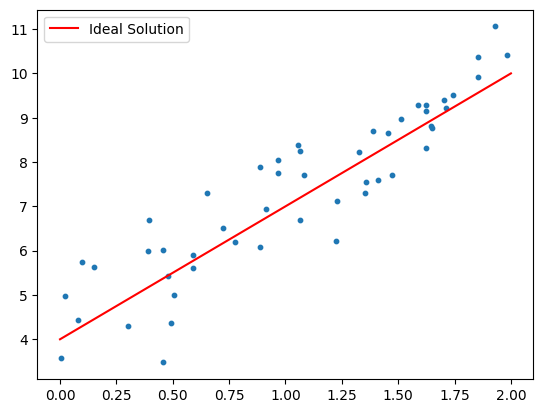

In [28]:
# Plot data
def plot_data():
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=10)
    ax.plot([0, 2], [d, 2 * k + d], color="red", label="Ideal Solution")
    ax.legend()
    return fig, ax

plot_data()
plt.show()

Even with the ideal parameters, the model doesn't perfectly fit the data due to the added Gaussian noise.

## Mean Squared Error

The model's performance is commonly evaluated using Mean Squared Error (MSE):
$$MSE=\frac 1 n \sum_{i=1}^n (y_i−\hat y_i)^2$$

In [29]:
def mean_squared_error(y, y_hat):
    return np.sum((y - y_hat)**2)/ y.shape[0]

y_ideal = d + k * x

print("Mean Squared Error: ", mean_squared_error(y, y_ideal))

Mean Squared Error:  0.6149312404134968


Even the ideal model incurs some error due to noise.

---

### Closed-Form Solution (Normal Equation)

In practice, the true parameters $k$ and $d$ are unknown. Fortunately, there exists a closed-form solution using linear algebra. First, we express the model as:

$$
\hat{\mathbf{Y}} = \mathbf{X} \mathbf{w}
$$

Where:

* $\mathbf{X}$ is an $n \times (d+1)$ matrix with a column of ones for the intercept term.
* $\mathbf{w}$ is a vector of model parameters.
* $\hat{\mathbf{Y}}$ is the vector of predictions.

The loss function becomes:

$$
J(\mathbf{w}) = \|\mathbf{y} - \mathbf{Xw}\|^2
$$

Setting the gradient to zero and solving yields the **normal equation**:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [30]:
# adding column of ones to X
ones = np.ones((x.shape[0], 1)) 
X = np.hstack((ones, x)) 

In [34]:
# calculating ideal w and predicting y values
w = np.linalg.inv(X.T @ X) @ X.T @ y
Y_hat = X @ w
mean_squared_error(y, Y_hat)

np.float64(3.457589455007784)

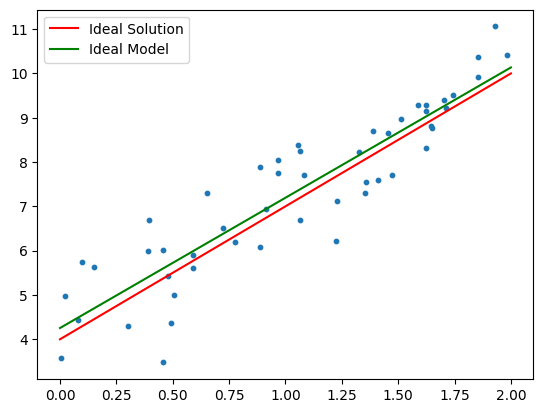

In [32]:
fig, ax = plot_data()
ax.plot([0,2], [w[0], w[1]*2 + w[0]], color="green", label="Ideal Model")
ax.legend()
plt.show()

## Applying Linear Regression to Real Data

Let’s now apply linear regression to a real-world dataset: **California Housing**, using `sklearn.linear_model.LinearRegression`.

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = fetch_california_housing(as_frame=True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


This dataset contains multiple features to predict `MedHouseVal` (median house value), making the model more complex but also harder to visualize.

### Train/Test Split and Model Training


In [18]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_hat)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5558915986952444


## Visualizing Predictions

To visualize the model’s predictions geographically, we’ll plot latitude and longitude, coloring by `MedHouseVal`.

In [21]:
y_hat = model.predict(X)

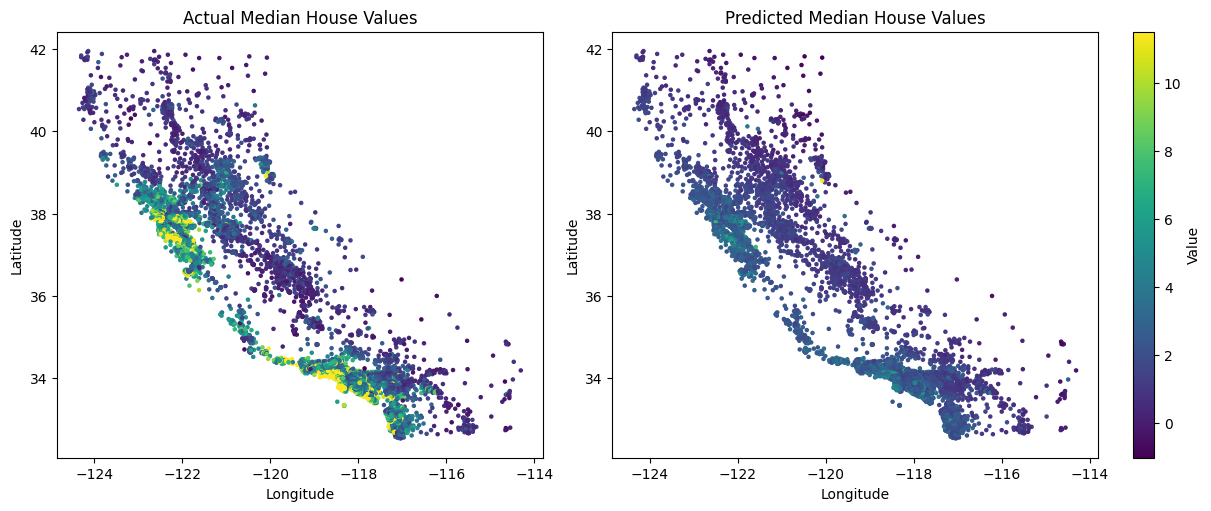

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), constrained_layout=True)

# First plot — true values
sc1 = ax1.scatter(df["Longitude"], df["Latitude"], c=df["MedHouseVal"], cmap="viridis", s=5)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Actual Median House Values")

# Second plot — predicted values
sc2 = ax2.scatter(df["Longitude"], df["Latitude"], c=y_hat, cmap="viridis", s=5)
fig.colorbar(sc2, ax=ax2, label="Value")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Predicted Median House Values")

plt.show()

The model captures the overall trend but struggles with high-value regions, indicating that a linear model may not be expressive enough for all nuances in the data. We'll explore more powerful models in future challenges.